<a href="https://colab.research.google.com/github/Darshan2104/PlayWithPytorch/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     |██████████████▋                 | 834.1 MB 1.5 MB/s eta 0:10:49tcmalloc: large alloc 1147494400 bytes == 0x563739328000 @  0x7f7815892615 0x563700a884cc 0x563700b6847a 0x563700a8b2ed 0x563700b7ce1d 0x563700afee99 0x563700af99ee 0x563700a8cbda 0x563700afed00 0x563700af99ee 0x563700a8cbda 0x563700afb737 0x563700b7dc66 0x563700afadaf 0x563700b7dc66 0x563700afadaf 0x563700b7dc66 0x563700afadaf 0x563700a8d039 0x563700ad0409 0x563700a8bc52 0x563700afec25 0x563700af99ee 0x563700a8cbda 0x563700afb737 0x563700af99ee 0x563700a8cbda 0x563700afa915 0x563700a8cafa 0x563700afac0d 0x563700af99ee
     |██████████████████▌             | 1055.7 MB 1.2 MB/s eta 0:10:19tcmalloc: large alloc 1434370048 bytes == 0x56377d97e000 @  0x7f7815892615 0x563700a884cc 0x563700b6847a 0x563700a8b2ed 0x563700b7ce1d 0x563700afee99 0x563700af99ee 0x563700a8cbda 0x563700afed00 0x563700af99ee 0x563700a8cbda 0x563700afb737 0x563700b7dc66 0x5637

In [2]:
import torch

In [3]:
torch.cuda.is_available()

False

In [9]:
x = torch.rand(4,3,2) #tensor dimensions
print(x)

tensor([[[0.9806, 0.3334],
         [0.3489, 0.7747],
         [0.2055, 0.4267]],

        [[0.2001, 0.5030],
         [0.8755, 0.9794],
         [0.3705, 0.2394]],

        [[0.0542, 0.0816],
         [0.6304, 0.7971],
         [0.2449, 0.3584]],

        [[0.4733, 0.2579],
         [0.3429, 0.5986],
         [0.2872, 0.4446]]])


In [11]:
x.dtype #default

torch.float32

In [19]:
x = torch.rand(4,3,2, dtype=torch.double)
print(x.dtype)
# this tensors have same operations as we have in numpy.
# arithmetic, Slicinig,

torch.float64


In [29]:
# Converting Numpy array to tensor and viseversa
import numpy as np

print("Tensor to Numpy :")
a = torch.ones(5)
b = a.numpy()
print(type(a))
print(type(b))

# If we are working with CPUs only then both tensors and numpy array are sharing same memory
a.add_(1)
print(a)
print(b)

# Numpy to tensor 
x= np.ones(5)
y=torch.from_numpy(x)
print("\nNumpy to Tensor :")
print(x)
print(y)

Tensor to Numpy :
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]

Numpy to Tensor :
[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


## **Computing Gradients!**

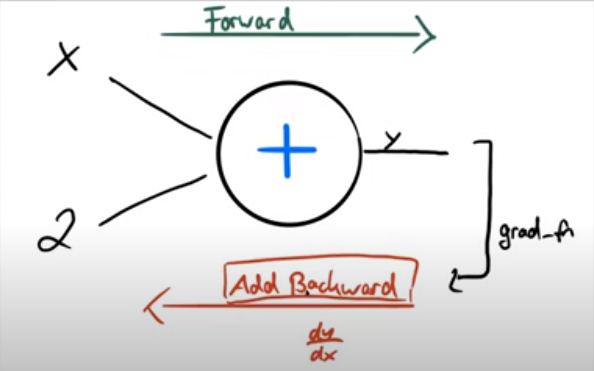

In [38]:
x= torch.rand(3 ,requires_grad=True)
print(x)
y= x+2 # this is not a commmen addition
print(y)
z= y*y*2
print(z)
z=z.mean()
print(f"Z value after mean : {z}")

# Here backward() need a scaler value as our z has only one element that's the reason it working fine
z.backward() #dz/dx
# Now gradients for x is calculated let's see
print(f"Value of Gradients : {x.grad}")

tensor([0.1835, 0.4917, 0.9263], requires_grad=True)
tensor([2.1835, 2.4917, 2.9263], grad_fn=<AddBackward0>)
tensor([ 9.5351, 12.4169, 17.1270], grad_fn=<MulBackward0>)
Z value after mean : 13.026324272155762
Value of Gradients : tensor([2.9113, 3.3222, 3.9018])


**What is happening in background :**
  
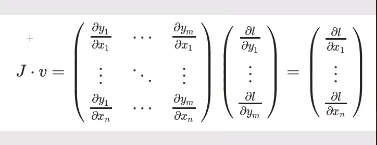

In [40]:
weigths = torch.ones(4,requires_grad=True)

model_output = (weigths*3).sum()
model_output.backward()

weigths.grad.zero_()

tensor([0., 0., 0., 0.])